In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, precision_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dta = sm.datasets.fair.load_pandas().data

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [6]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [7]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [8]:
dta.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

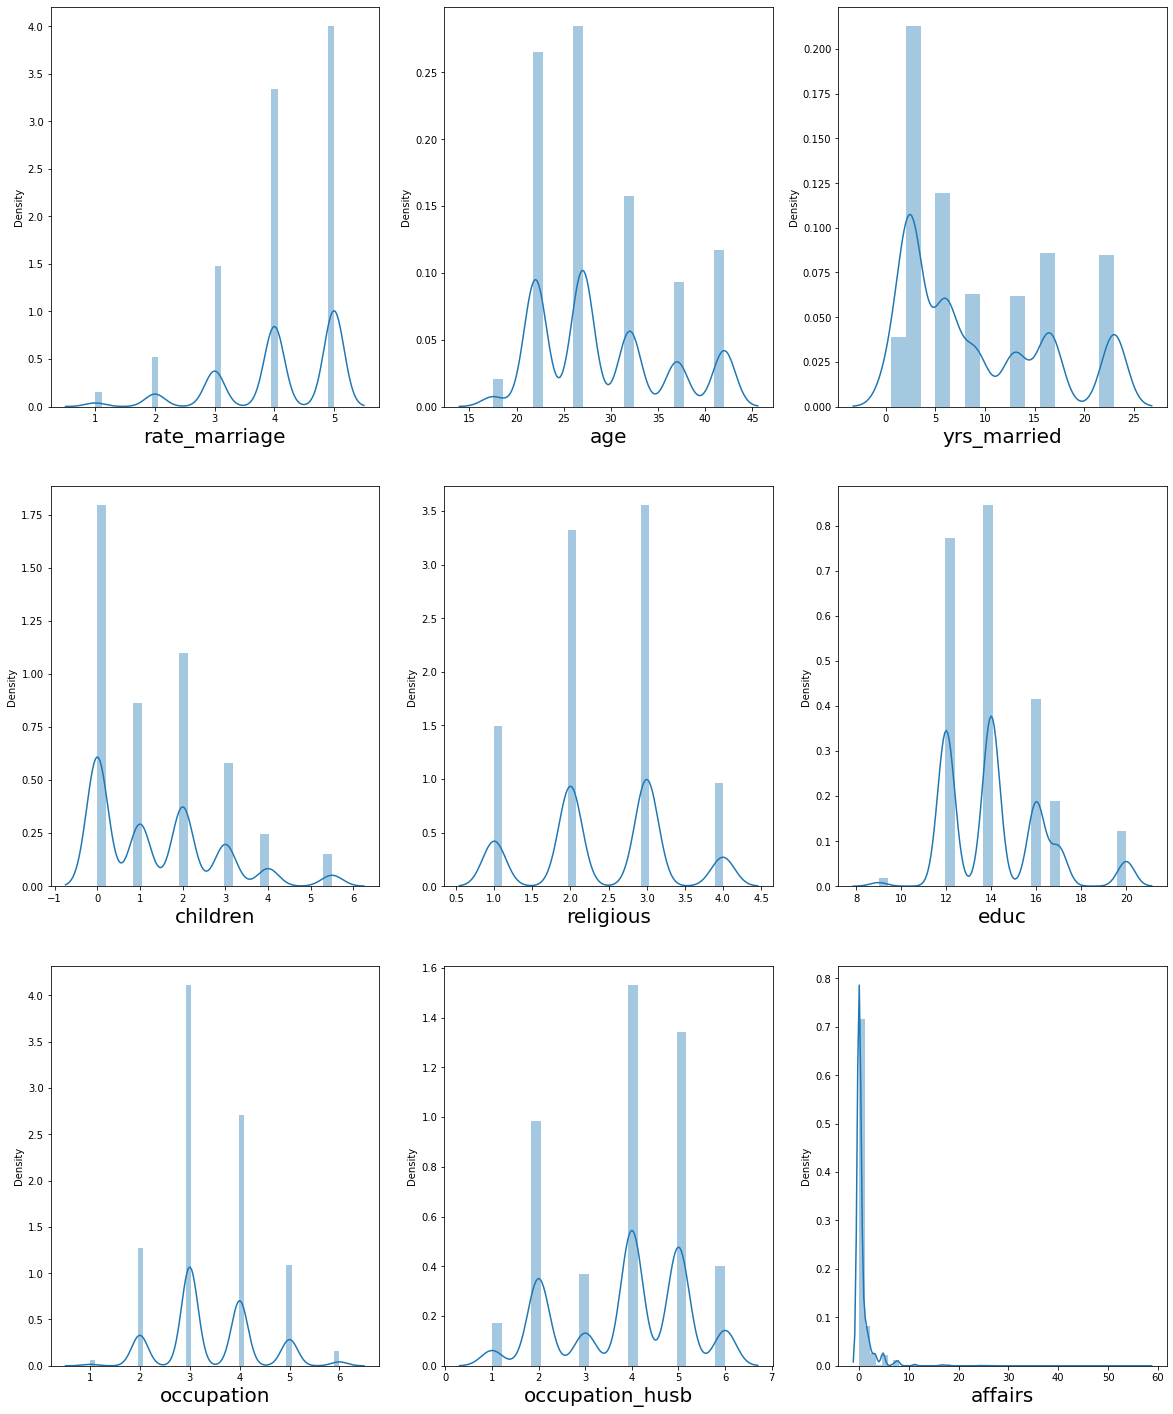

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for i in dta:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber += 1
plt.show()        

<AxesSubplot:>

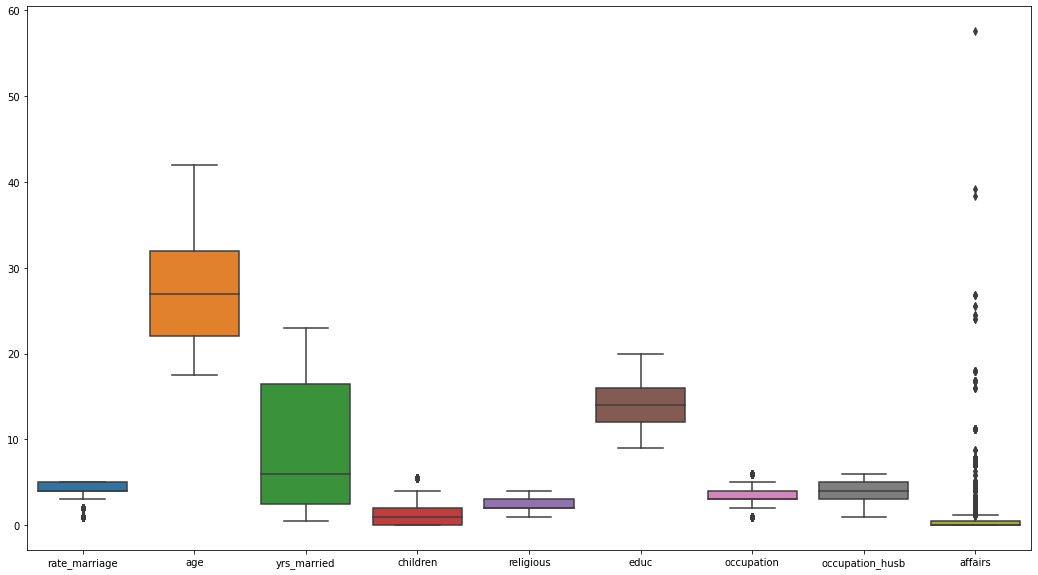

In [10]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.boxplot(data = dta, ax = ax)

In [11]:
q = dta["affairs"].quantile(.99)
dta = dta[dta["affairs"]< q]

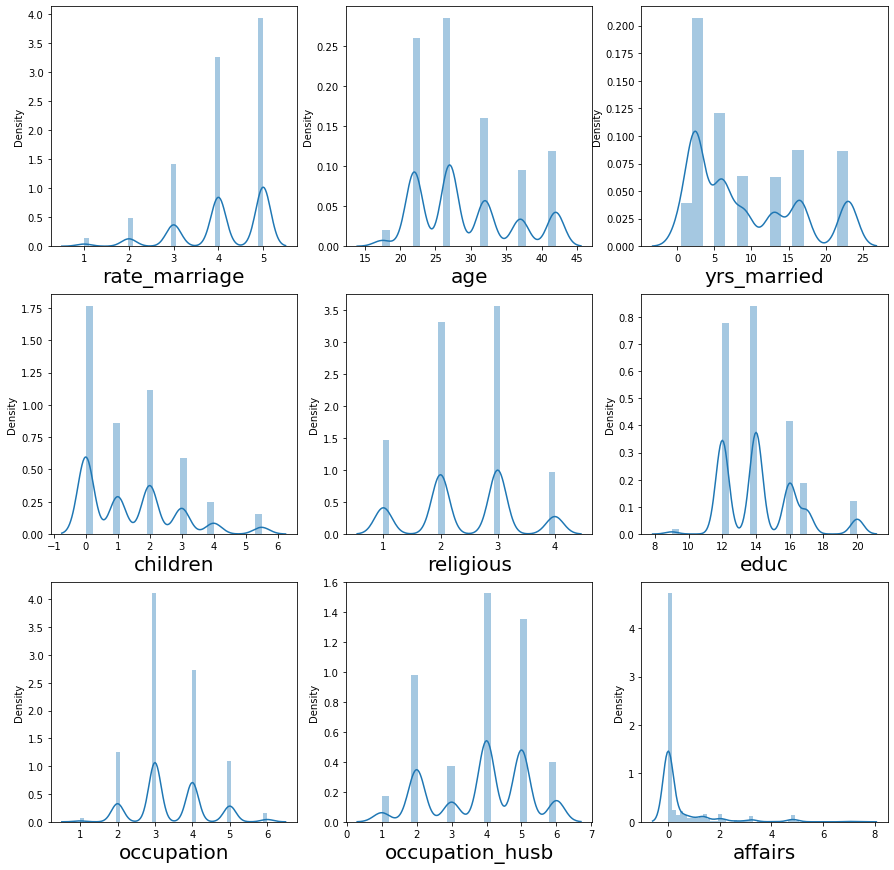

In [12]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1
for i in dta:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber += 1
plt.show()        

<AxesSubplot:>

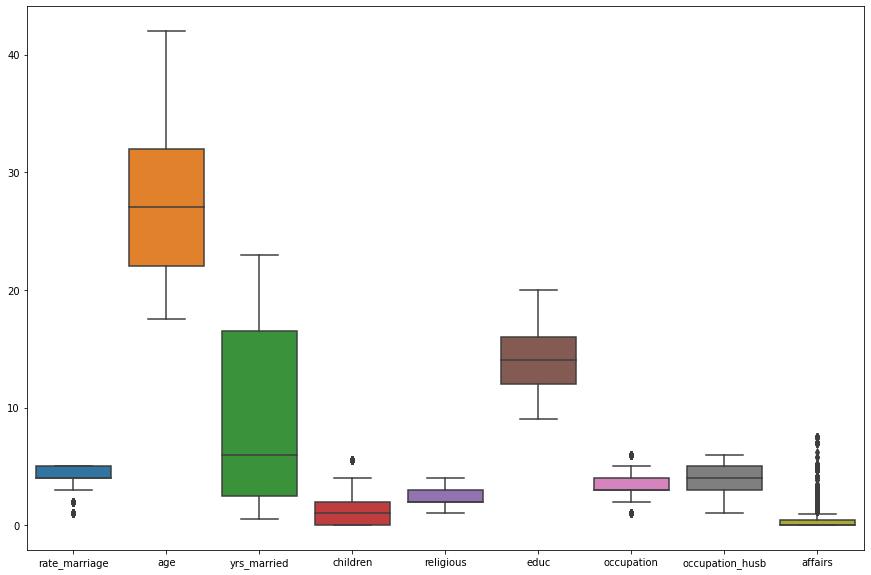

In [13]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = dta, ax = ax)

In [14]:
x_features = dta.drop(columns = 'affairs')

In [15]:
x_features.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [16]:
scale = StandardScaler()
x_scaler = scale.fit_transform(x_features)
x_scaler

array([[-1.16796073,  0.41291842, -0.01516822, ...,  1.2813925 ,
        -1.51704092,  0.85146944],
       [-1.16796073, -0.3162544 ,  0.53338484, ..., -0.09575434,
        -0.45329434,  0.10784409],
       [-0.1237508 , -1.04542721, -0.90656696, ...,  0.82234355,
        -0.45329434,  0.85146944],
       ...,
       [ 0.92045913, -1.04542721, -0.90656696, ..., -0.09575434,
        -0.45329434, -2.12303197],
       [ 0.92045913,  0.41291842, -0.42658302, ..., -0.09575434,
        -0.45329434,  0.10784409],
       [-0.1237508 , -1.04542721, -0.90656696, ...,  0.82234355,
        -1.51704092,  0.10784409]])

In [17]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_scaler, i) for i in range(x_scaler.shape[1])]
vif["features"] = x_features.columns
vif

,VIF,features
0,1.036125,rate_marriage
1,5.455700,age
2,7.142851,yrs_married
3,2.520738,children
4,1.033816,religious
5,1.296390,educ
6,1.207082,occupation
7,1.083634,occupation_husb


In [39]:
#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 430)

In [41]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
model.score(x_test, y_test)

0.7375478927203065

In [43]:
model.score(x_train, y_train)

0.7222577209797657

In [44]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7375478927203065